In [27]:
%run matrix.ipynb
%run graph.ipynb

In [28]:
class BinaryRelation:
    
    def __init__(self,relation,domain,codomain,check=False):
        if check == True and self.is_valid(relation, domain, codomain) == False:
            raise Exception(f"Binary relation {(relation, domain, codomain)} is not valid!")
        self._relation = set(relation)
        self._domain   = set(domain)
        self._codomain = set(codomain)
        
    def is_valid(self, relation, domain, codomain):
        try:
            return {(x,y) for x,y in relation} - {(x,y) for x in domain for y in codomain} == set()
        except TypeError:
            return False
        
    def get_relation(self):
        return self._relation
    
    def set_relation(self, relation, check=False):
        if check == True and self.is_valid(relation, self.get_domain(), self.get_codomain()) == False:
            raise Exception(f"New relation {(relation)} is not valid!")
        self._relation = set(relation)
        
    def get_domain(self):
        return self._domain
    
    def set_domain(self, domain, check=False):
        if check == True and self.is_valid(self.get_relation(), domain, self.get_codomain()) == False:
            raise Exception(f"New domain {(domain)} is not valid!")
        self._domain = set(domain)
        
    def get_codomain(self):
        return self._codomain
    
    def set_codomain(self, codomain, check=False):
        if check == True and self.is_valid(self.get_relation(), self.get_domain(), codomain) == False:
            raise Exception(f"New codomain {(codomain)} is not valid!")
        self._codomain = set(codomain)
        
    def __len__(self):
        return len(self.get_relation())
        
    def __repr__(self):
        r =  f"domain:   {self.get_domain()}  \n"
        r += f"codomain: {self.get_codomain()}\n"
        r += f"relation: {self.get_relation()}\n" 
        return r
    
    def __contains__(self, element):
        return element in self.get_relation()

    
    def matrix_representation(self):
        dom =   list(self.get_domain())
        codom = list(self.get_codomain())
        relation = self.get_relation()
        matrix =  [[0 for col in range(len(codom))] for row in range(len(dom))]
        for i,j in relation:
            matrix[dom.index(i)][codom.index(j)] = 1
        return matrix, dom, codom
        
    def __eq__(self, other):
        return (self.get_relation() == other.get_relation()) and \
                 (self.get_domain() == other.get_domain()) and \
               (self.get_codomain() == other.get_codomain())
    
    def __ne__(self, other):
        return self.get_relation() != other.get_relation() or \
                (self.get_domain() != other.get_domain()) or \
              (self.get_codomain() != other.get_codomain())
    
    def is_valid_for_set_operations(self, other):
        return (self.get_domain() == other.get_domain()) and (self.get_codomain() == other.get_codomain())
    
    def __lt__(self, other):
        if self.is_valid_for_set_operations(other) == True:
            return self.get_relation().issubset(other.get_relation()) and self.get_relation() != other.get_relation()
        else:
            raise Exception(f"{self} and {other} are not compatible for __lt__ operation!")
        
    def __le__(self, other):
        if self.is_valid_for_set_operations(other) == True:
            return self.get_relation().issubset(other.get_relation())
        else:
            raise Exception(f"{self} and {other} are not compatible for __le__ operation!")
    
    def __gt__(self, other):
        if self.is_valid_for_set_operations(other) == True:
            return self.get_relation().issuperset(other.get_relation()) and self.get_relation() != other.get_relation()
        else:
            raise Exception(f"{self} and {other} are not compatible for __gt__ operation!")
        
    def __ge__(self, other):
        if self.is_valid_for_set_operations(other) == True:
            return self.get_relation().issuperset(other.get_relation())
        else:
            raise Exception(f"{self} and {other} are not compatible for __ge__ operation!")
        
    def union(self, other, check=True):
        if self.is_valid_for_set_operations(other) == True:
            return BinaryRelation(self.get_relation().union(other.get_relation())
                                  ,self.get_domain(), self.get_codomain(), check)
        else:
            raise Exception(f"{self} and {other} are not compatible for union operation!")
            
    def __or__(self, other):
        return self.union(other)     
        
    def intersection(self, other, check=True):
        if self.is_valid_for_set_operations(other) == True: 
            return BinaryRelation(self.get_relation().intersection(other.get_relation())
                                  ,self.get_domain(), self.get_codomain(), check)
        else:
            raise Exception(f"{self} and {other} are not compatible for intersection operation!")
            
    def __and__(self, other):
        return self.intersection(other)
        
    def difference(self, other, check=True):
        if self.is_valid_for_set_operations(other) == True: 
            return BinaryRelation(self.get_relation().difference(other.get_relation())
                                  ,self.get_domain(), self.get_codomain(), check)
        else:
            raise Exception(f"{self} and {other} are not compatible for difference operation!")
            
    def __sub__(self, other):
        return self.difference(other)
    
    def symmetric_difference(self, other, check=True):
        if self.is_valid_for_set_operations(other) == True:
            return BinaryRelation(self.get_relation().symmetric_difference(other.get_relation())
                                  ,self.get_domain(), self.get_codomain(), check)
        else:
            raise Exception(f"{self} and {other} are not compatible for symmetric_difference operation!")
            
    def __xor__(self, other):
        return self.symmetric_difference(other)
            
    def cartesian_product(self):
        return {(x,y) for x in self.get_domain() for y in self.get_codomain()}
        
    def complement(self):
        return BinaryRelation(self.cartesian_product().difference(self.get_relation())
                              ,self.get_domain(), self.get_codomain())
     
    def composition(self, other):    
        if self.get_codomain() == other.get_domain():
            relation_composition = set()
            for x1,y1 in self.get_relation():
                for y2,z2 in other.get_relation():
                    if y1 == y2:
                        relation_composition.add((x1,z2))
            return BinaryRelation(relation_composition, self.get_domain(), other.get_codomain())
        else:
            raise Exception(f"{self} and {other} are not compatible for composition!")
    
    def converse(self):       
        relation_converse = {(y,x) for x,y in self.get_relation()}     
        return BinaryRelation(relation_converse, self.get_codomain(), self.get_domain())
    
    def dom(self):
        return {x for x,y in self.get_relation()}
    
    def rng(self):
        return {y for x,y in self.get_relation()}
    
    def is_out_relation_with(self, element): #∀y : element R y
        for x,y in self.get_relation():
            if x == element:
                yield y
    
    def is_in_relation_with(self, element): #∀x : x R element
        for x,y in self.get_relation():
            if y == element:
                yield x
    
    def is_homogeneous_relation(self):
        return self.get_domain() == self.get_codomain()
    
    def is_identity_relation(self):
        return self.is_homogeneous_relation() and self.get_relation() == {(x,x) for x in self.get_domain()}
    
    def is_function(self):
        return len(self.get_relation()) == len(self.get_domain()) and self.dom() == self.get_domain()
    
    def show_matrix(self):
        return MatrixGraph("matrix", Matrix(self)).create_matrix_graph()
        
    def show_graph(self):
        return BipartiteGraph("bipartite graph", Subgraph(self)).create_graph()
    
    def image(self, subset):
        if subset.issubset(self.get_domain()) == False:
            raise Exception(f"{subset} is not subset of domain {self.get_domain()}")
        return {y for a in subset for y in self.is_out_relation_with(a)}
        
    def preimage(self, subset):
        if subset.issubset(self.get_codomain()) == False:
            raise Exception(f"{subset} is not subset of codomain {self.get_codomain()}")
        return {x for a in subset for x in self.is_in_relation_with(a)}
    
    

In [48]:
binary_relation = BinaryRelation({(1,'a'),(2,'b'),(2,'d'),(3,'a'),(3,'c'),(3,'d')},{1,2,3},{'a','b','c','d'},True)
#binary_relation.show_graph()
binary_relation.image({1,2})
binary_relation.preimage({'a'})

{1, 3}

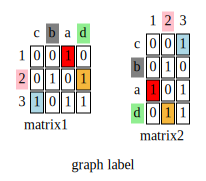

In [21]:
binary_relation1 = BinaryRelation({(1,'a'),(2,'b'),(2,'d'),(3,'a'),(3,'c'),(3,'d')},{1,2,3},{'a','b','c','d'},True)
popis_matice = "matrix1"
highlight_relation = {(1,'a'):"red",(2,'d'):"#f6b73c",(3,'c'):"LightBlue"}
highlight_domain = {2:"pink"}
highlight_codomain = {'b':"#808080",'d':"#90EE90"}
matrix1 = Matrix(binary_relation1, popis_matice, highlight_relation, highlight_domain, highlight_codomain)

binary_relation2 = binary_relation1.converse()
popis_matice = "matrix2"
highlight_relation = {('a',1):"red",('d',2):"#f6b73c",('c',3):"LightBlue"}
highlight_domain = {'b':"#808080",'d':"#90EE90"}
highlight_codomain = {2:"pink"}
matrix2 = Matrix(binary_relation2, popis_matice, highlight_relation, highlight_domain, highlight_codomain)

popis_grafu = "graph label"
matrix_graph = MatrixGraph(popis_grafu, matrix1, matrix2)

matrix_graph.create_matrix_graph()

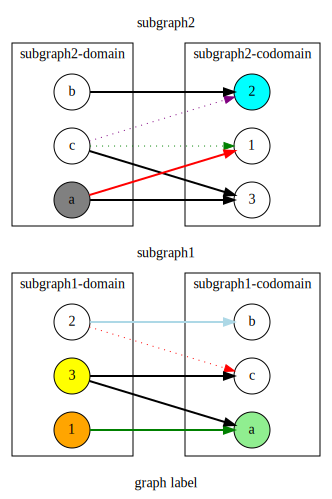

In [44]:
binary_relation1 = BinaryRelation({(1,'a'),(2,'b'),(3,'c'),(3,'a')},{1,2,3},{'a','b','c'},True)
subgraph_label = "subgraph1"
highlight_relation = {(1,'a'):"green", (2,'b'):"LightBlue"}
highlight_domain = {1:"orange", 3:"yellow"}
highlight_codomain = {'a':"LightGreen"}
fake_edges = {(2,'c'):"red"}
subgraph1 = Subgraph(binary_relation1, subgraph_label, highlight_relation, highlight_domain, highlight_codomain, fake_edges)

binary_relation2 = binary_relation1.converse()
subgraph_label = "subgraph2"
highlight_relation = {('a',1):"red"}
highlight_domain = {'a':"grey"}
highlight_codomain = {2:"aqua"}
fake_edges = {('c',2):"purple",('c',1):"green"}
subgraph2 = Subgraph(binary_relation2, subgraph_label, highlight_relation, highlight_domain, highlight_codomain, fake_edges)


graph_label = "graph label"
bipartite_graph = BipartiteGraph(graph_label, subgraph1, subgraph2)

bipartite_graph.create_graph()

In [ ]:
relation1 = BinaryRelation({(1,'a'),(2,'b'),(2,'d'),(3,'a'),(3,'c'),(3,'d')},{1,2,3},{'a','b','c','d'}, True)
relation1.image({2})
#relation1.preimage({'a'})

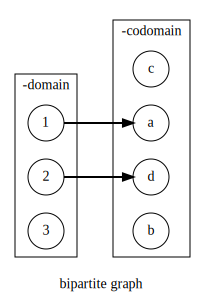

In [73]:
# relation1 = BinaryRelation({(1,'a'),(2,'d')},{1,2,3},{'a','b','c','d'}, True)
# relation1
# relation1.show_matrix()
# relation1.show_graph()

In [ ]:
import unittest

class TestNotebook_binaryRelation(unittest.TestCase):

    A = {1,2,3}
    B = {4,5,6}
    
    def test_valid_binaryRelation(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r, BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True))
    
    def test_not_valid_binaryRelation(self):
        self.assertRaises(Exception, BinaryRelation,{(1,4),(1,5),(2,4),(3,6),(4,4)},self.A,self.B,True)
        
    def test_eq(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r.__eq__(s), True)
        
    def test_eq_same(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r.__eq__(r), True)
        
    def test_eq_different_domain(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A|{4},self.B,True)
        self.assertEqual(r.__eq__(s), False)
        
    def test_eq_different_codomain(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B|{7},True)
        self.assertEqual(r.__eq__(s), False)
        
    def test_eq_different_relation(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(2,4),(3,6)},self.A,self.B|{7},True)
        self.assertEqual(r.__eq__(s), False)
        
    def test_ne(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B|{7},True)
        self.assertEqual(r.__ne__(s), True)
        
    def test_ne_same(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r.__ne__(r), False)
        
    def test_lt(self):
        r = BinaryRelation({(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r.__lt__(s), True)
        
    def test_lt_empty(self):
        r = BinaryRelation({},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r.__lt__(s), True)
        
    def test_lt_same(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r.__lt__(r), False)
        
    def test_lt_not_valid(self):
        r = BinaryRelation({(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B|{7},True)
        self.assertRaises(Exception, r.__lt__, s)
    
    def test_le(self):
        r = BinaryRelation({(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r.__le__(s), True)
        
    def test_le_same(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r.__le__(s), True)
        
    def test_le_empty(self):
        r = BinaryRelation({},self.A,self.B)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r.__le__(s), True)
        
    def test_le_not_valid(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B|{7},True)
        self.assertRaises(Exception, r.__le__, s)
        
    def test_gt(self):
        r = BinaryRelation({(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(s.__gt__(r), True)
        
    def test_gt_empty(self):
        r = BinaryRelation({},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(s.__gt__(r), True)
        
    def test_gt_same(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r.__gt__(r), False)
        
    def test_gt_not_valid(self):
        r = BinaryRelation({(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B|{7},True)
        self.assertRaises(Exception, s.__gt__, r)
    
    def test_ge(self):
        r = BinaryRelation({(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(s.__ge__(r), True)
        
    def test_ge_same(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(s.__ge__(r), True)
        
    def test_ge_empty(self):
        r = BinaryRelation({},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(s.__ge__(r), True)
        
    def test_ge_not_valid(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B|{7},True)
        self.assertRaises(Exception, s.__ge__, r)
        
    def test_or(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(2,4),(2,5),(3,4)},self.A,self.B,True)
        self.assertEqual(s | r, BinaryRelation({(1,4),(1,5),(2,4),(3,6),(2,4),(2,5),(3,4)},self.A,self.B,True))
        
    def test_or_same(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r | r, r)
        
    def test_or_empty(self):
        r = BinaryRelation({},self.A, self.B, True)
        self.assertEqual(r | r, BinaryRelation({},self.A, self.B, True))
        
    def test_or_first_empty(self):
        r = BinaryRelation({},self.A, self.B, True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r | s, s)
        
    def test_or_second_empty(self):
        r = BinaryRelation({},self.A, self.B, True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(s | r, s)
        
    def test_or_not_valid(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B|{7},True)
        self.assertRaises(Exception, s.__or__, r)
        
    def test_and(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(2,4),(2,5),(3,4)},self.A,self.B,True)
        self.assertEqual(s & r, BinaryRelation({(2,4)},self.A,self.B,True))
        
    def test_and_same(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r & r, r)
        
    def test_and_empty(self):
        r = BinaryRelation({},self.A, self.B, True)
        self.assertEqual(r & r, BinaryRelation({},self.A, self.B, True))
        
    def test_and_first_empty(self):
        r = BinaryRelation({},self.A, self.B, True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r & s, r)
        
    def test_and_second_empty(self):
        r = BinaryRelation({},self.A, self.B, True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(s & r, r)
        
    def test_and_not_valid(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B|{7},True)
        self.assertRaises(Exception, s.__and__, r)
        
    def test_sub(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(2,4),(2,5),(3,4)},self.A,self.B,True)
        self.assertEqual(s - r, BinaryRelation({(2,5),(3,4)},self.A,self.B,True))
        
    def test_sub_same(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r - r, BinaryRelation({},self.A, self.B, True))
        
    def test_sub_empty(self):
        r = BinaryRelation({},self.A, self.B, True)
        self.assertEqual(r - r, BinaryRelation({},self.A, self.B, True))
        
    def test_sub_first_empty(self):
        r = BinaryRelation({},self.A, self.B, True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r - s, r)
        
    def test_sub_second_empty(self):
        r = BinaryRelation({},self.A, self.B, True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(s - r, s)
        
    def test_sub_not_valid(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B|{7},True)
        self.assertRaises(Exception, s.__sub__, r)
        
    def test_xor(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(2,4),(2,5),(3,4)},self.A,self.B,True)
        self.assertEqual(s ^ r, BinaryRelation({(1,4),(1,5),(3,6),(2,5),(3,4)},self.A,self.B,True))
        
    def test_xor_same(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r ^ r, BinaryRelation({},self.A, self.B, True))
        
    def test_xor_empty(self):
        r = BinaryRelation({},self.A, self.B, True)
        self.assertEqual(r ^ r, BinaryRelation({},self.A, self.B, True))
        
    def test_xor_first_empty(self):
        r = BinaryRelation({},self.A, self.B, True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r ^ s, s)
        
    def test_xor_second_empty(self):
        r = BinaryRelation({},self.A, self.B, True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(s ^ r, s)
        
    def test_xor_not_valid(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        s = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B|{7},True)
        self.assertRaises(Exception, s.__xor__, r)
        
    def test_contains(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual((1,4) in r, True)
        
    def test_contains_not(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual((9,4) in r, False)
        
    def test_contains_empty(self):
        r = BinaryRelation({},self.A,self.B,True)
        self.assertEqual((2,2) in r, False)
        
    def test_set_domain(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        r.set_domain({1,2,3,4},True)
        self.assertEqual(r.get_domain(), {1,2,3,4})
        
    def test_set_domain_not_valid(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertRaises(Exception, r.set_domain, {1,2}, True)
        
    def test_set_codomain(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        r.set_codomain({4,5,6,7},True)
        self.assertEqual(r.get_codomain(), {4,5,6,7})
        
    def test_set_codomain_not_valid(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertRaises(Exception, r.set_codomain, {8,9}, True)
        
    def test_set_relation(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        r.set_relation({(1,6),(3,4)},True)
        self.assertEqual(r.get_relation(), {(1,6),(3,4)})
        
    def test_set_relation_not_valid(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertRaises(Exception, r.set_relation, {6,1}, True)
        
    def test_dom(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r.dom(), {1,2,3})
        
    def test_rng(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual(r.rng(), {4,5,6})
        
    def test_union(self):
        r = BinaryRelation({(1,1),(2,2),(3,3)},self.A, self.A)
        s = BinaryRelation({(1,2),(2,3),(3,3)},self.A, self.A)
        self.assertEqual(r | s, BinaryRelation({(1,1),(2,2),(1,2),(2,3),(3,3)},self.A, self.A))
        
    def test_intersection(self):
        r = BinaryRelation({(1,1),(2,2),(3,3)},self.A, self.A)
        s = BinaryRelation({(1,2),(2,3),(3,3)},self.A, self.A)
        self.assertEqual(r & s, BinaryRelation({(3,3)},self.A, self.A))
        
    def test_difference(self):
        r = BinaryRelation({(1,1),(2,2),(3,3)},self.A, self.A)
        s = BinaryRelation({(1,2),(2,3),(3,3)},self.A, self.A)
        self.assertEqual(r - s, BinaryRelation({(1,1),(2,2)},self.A, self.A))
        
    def test_symmetric_difference(self):
        r = BinaryRelation({(1,1),(2,2),(3,3)},self.A, self.A)
        s = BinaryRelation({(1,2),(2,3),(3,3)},self.A, self.A)
        self.assertEqual(r ^ s, BinaryRelation({(1,1),(2,2),(1,2),(2,3)},self.A, self.A))
        
    def test_complement(self):
        r = BinaryRelation({(1,1),(2,2),(3,3)},self.A, self.A)
        self.assertEqual(r.complement(),BinaryRelation({(1,2),(1,3),(2,1),(2,3),(3,1),(3,2)},self.A, self.A))
        
    def test_cartesian_product(self):
        r = BinaryRelation({(1,1),(2,2),(3,3)},self.A, self.A)
        self.assertEqual(r.cartesian_product(),{(1,1),(1,2),(1,3),(2,1),(2,2),(2,3),(3,1),(3,2),(3,3)})
        
    def test_composition(self):
        r = BinaryRelation({(1,1),(2,2),(3,3)},self.A, self.A)
        s = BinaryRelation({(1,'a'),(2,'b'),(3,'c'),(3,'a')},self.A, {'a','b','c'})
        self.assertEqual(r.composition(s),s)
        
    def test_converse(self):
        s = BinaryRelation({(1,2),(2,3),(3,3)},self.A, self.A)
        self.assertEqual(s.converse(),BinaryRelation({(2,1),(3,2),(3,3)},self.A, self.A))
        
    def test_is_out_relation_with(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual({x for x in r.is_out_relation_with(1)},{4,5})
        
    def test_is_in_relation_with(self):
        r = BinaryRelation({(1,4),(1,5),(2,4),(3,6)},self.A,self.B,True)
        self.assertEqual({x for x in r.is_in_relation_with(4)},{2,1})

    def test_is_homogeneous_relation(self):
        r = BinaryRelation({(1,2),(1,3),(2,2)},self.A,self.A,True)
        self.assertEqual(r.is_homogeneous_relation(),True)
        
    def test_is_identity_relation(self):
        r = BinaryRelation({(1,1),(3,3),(2,2)},self.A,self.A,True)
        self.assertEqual(r.is_identity_relation(),True)
        
unittest.main(argv=[''], verbosity=1, exit=False)